## Final Project Submission 

Please fill out:
* Student name: Joan K Njoroge
* Student pace: full time
* Scheduled project review date/time: 9/07/2023
* Instructor name: Veronica Isiaho
* Blog post URL: 


## Introduction: Project Overview

When purchasing or selling a house, homeowners rely on real estate professionals to teach them the ropes and make them aware of issues they may otherwise overlook. Given the size of the transaction, the agent's knowledge and experience can influence prices by five figures.
The aim of this project is to advise clients and propoerty owners on the impact of various factors on house saleprices in King County Washington.

## Business Problem
The outcomes will yield actionable insights to aimed to benefit stakeholders by:

* Sales growth will be facilitated by the insights gathered from the model, which will make it possible to create plans to improve sales performance by identifying the major variables affecting house selling prices.

* Regions with higher value properties. Can be assessed as more lavish or safe, ostentatious areas while cheaper prices regions can be considered smaller, more ancient areas of the county.

* allow city planning of areas. by investigating the effect of renovations 


In [124]:
# import necassary libraries
import pandas as pd
import numpy as np

# sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# statsmodels
from statsmodels.formula.api import ols
import statsmodels.api as sm

# scipy
import scipy.stats as stats

# rando
from itertools import combinations

import warnings
warnings.filterwarnings('ignore')

#visualizations
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline


#load the data
raw_df = pd.read_csv('data/kc_house_data.csv')
raw_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Data Cleaning and Preparation:

This step is aimed at:
1. Identify range constraints.
2. Identify categorical constraints.
3. Identify inconsistencies in the data.
4. Visualize the data to easily find outliers and strange distributions.
5. Counting errors in the data.
6. Identify missing values and find sensible ways to deal with them.
7. Convert data types
8. Feature engineering to create new columns i.e `has_basement`

The main strategy is to have clean data for modelling by:
1. Removal if need be.
2. Direct correction.
3. Scaling the data making variables in line with each other while retaining the proportional relationships.
4. Imputation.

# Step 1: Detect missing values

In [125]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

We are able to see that we have missing values in the `waterfront`, `view`, `yr_renovated` columns and will deal with each data type accordingly.

In [126]:
raw_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Exploring Categorical columns.

In [127]:
# objects in the dataset
objects_df = raw_df.select_dtypes(include=object)
objects_df

,date,waterfront,view,condition,grade,sqft_basement
0,10/13/2014,NaN,NONE,Average,7 Average,0.0
1,12/9/2014,NO,NONE,Average,7 Average,400.0
2,2/25/2015,NO,NONE,Average,6 Low Average,0.0
3,12/9/2014,NO,NONE,Very Good,7 Average,910.0
4,2/18/2015,NO,NONE,Average,8 Good,0.0
...,...,...,...,...,...,...
21592,5/21/2014,NO,NONE,Average,8 Good,0.0
21593,2/23/2015,NO,NONE,Average,8 Good,0.0
21594,6/23/2014,NO,NONE,Average,7 Average,0.0
21595,1/16/2015,NaN,NONE,Average,8 Good,0.0


In [128]:
# find unique varibles and null values in the categorical data
for column in objects_df.columns:
    print(f"COLUMN name: '{column}'")
    print(f"No. of unique values: {len(objects_df[column].unique())}")
    print(f"No. of null values: {objects_df[column].isnull().sum()}")
    print(f"% of null values: {(objects_df[column].isnull().sum() / len(objects_df[column]) * 100) }")
    print(objects_df[column].value_counts(normalize=True))
    print()

COLUMN name: 'date'
No. of unique values: 372
No. of null values: 0
% of null values: 0.0
6/23/2014     0.006575
6/26/2014     0.006066
6/25/2014     0.006066
7/8/2014      0.005880
4/27/2015     0.005834
                ...   
8/30/2014     0.000046
5/17/2014     0.000046
11/30/2014    0.000046
7/27/2014     0.000046
5/24/2015     0.000046
Name: date, Length: 372, dtype: float64

COLUMN name: 'waterfront'
No. of unique values: 3
No. of null values: 2376
% of null values: 11.00152798999861
NO     0.992404
YES    0.007596
Name: waterfront, dtype: float64

COLUMN name: 'view'
No. of unique values: 6
No. of null values: 63
% of null values: 0.29170718155299347
NONE         0.901923
AVERAGE      0.044441
GOOD         0.023591
FAIR         0.015325
EXCELLENT    0.014721
Name: view, dtype: float64

COLUMN name: 'condition'
No. of unique values: 5
No. of null values: 0
% of null values: 0.0
Average      0.649164
Good         0.262861
Very Good    0.078761
Fair         0.007871
Poor         0.

* The inconsistencies identified in the object_df are

|Variable       | Type       | values  | Strategy|
| :-----:       | :-----:    | :-----: | :-----: |
|`date`         | Categorical|* mm/dd/yyyy | 
|`waterfront`   | Boolean    | * YES/NO <br /> * 11% null values | * replace null values to 'NO' <br /> * Less than 1% of homes are waterfront, so we assume that NaN means no waterfront view,
|`view`         | Categorical|* 6 unique values <br />* 0.29% null values| fill null values with 'NONE' assuming NaN means no view
|`condtion`     | Categorical|* 5 unique <br/>* 0 null | * map the variable to match the description
|`grade`        | Ordinal    |* 11 uniique <br /> * numeric value and desc. | clean the column to show numeric value and remove the description
|`sqft_basement`| Boolean    |* float <br /> * '?' placeholder <br /> * area cannot be 0.0sqft | * create column has_basement <br /> * values:1/0

#### Cleaning categorical data

1. `waterfront` column: change the column to 1 / 0 and fill those with NaN values to 0

In [129]:
# 1. replace `waterfront`` {np.nan:'NO'}
raw_df['waterfront'].replace({np.nan:'NO'}, inplace=True)

wtrfrnt = []
for val in raw_df['waterfront']:
    if val == 'NO':
        wtrfrnt.append('0')
    else:
        wtrfrnt.append('1')

int_wtrfrnt = [eval(i) for i in wtrfrnt]
print(int_wtrfrnt)
        
raw_df['waterfront'] = int_wtrfrnt

#check
raw_df['waterfront'].value_counts()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

0    21451
1      146
Name: waterfront, dtype: int64

2. `view` column: fill null values with 'NONE'
Documentation describes 

In [130]:
# 2. change `view` null values to 'NONE'
raw_df['view'].fillna('NONE', inplace=True)

#check
raw_df['view'].value_counts()

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

3. `condition` column: map conditions to their numerical key-value pair


In [131]:
#Map condition column to numerical codes
condition_mapping = {'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}
raw_df['condition'] = raw_df['condition'].map(condition_mapping)

raw_df.condition.value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

4. `grade` column: show numeric value and remove the description

In [132]:
# keep 'grade' as int and remove description
raw_df['grade'] = [int(grade[:2]) for grade in objects_df['grade']]

#check
raw_df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

5. `sqft_basement` column: if value '0.0' or '?' append new column 0, else 1


In [133]:
basement = []
for sq_ft in raw_df['sqft_basement']:
    if sq_ft == '0.0':
        basement.append('0')
    elif sq_ft == '?':
        basement.append('0')
    else:
        basement.append('1')

int_basement = [eval(i) for i in basement]
print(int_basement)
        
raw_df['has_basement'] = int_basement

# drop `sqft_basement`
raw_df = raw_df.drop('sqft_basement', axis=1)

# check 
raw_df.head()

[0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,7,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,NONE,...,7,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,NONE,...,6,770,1933,NaN,98028,47.7379,-122.233,2720,8062,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,NONE,...,7,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,NONE,...,8,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,0


#### Creating dummy variables of categorical data

In [134]:
# we have already dealt with the other object column in the df
# as thus only view is not numeru=ical
dummies_cols = raw_df[['view']]
dummies_cols

,view
0,NONE
1,NONE
2,NONE
3,NONE
4,NONE
...,...
21592,NONE
21593,NONE
21594,NONE
21595,NONE


In [135]:
# 8. pd.get_dummies(dummies_df, drop_first=True)
dummies_df = pd.get_dummies(dummies_cols, drop_first=True)
dummies_df.head()

,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


The choice to only use one hot encoding on the view allowed to retain even more columns.
Only view_AVERAGE was dropped.

### Exploratory Data Analysis of Numerical data

1. Detecting outliers using boxplots


In [136]:
# Lets check for outliers. Lets plot our boxplot
# get all numerical columns

cols_cont_df = raw_df.select_dtypes(exclude = object).columns
cols_cont_df

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade', 'sqft_above', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'has_basement'],
      dtype='object')

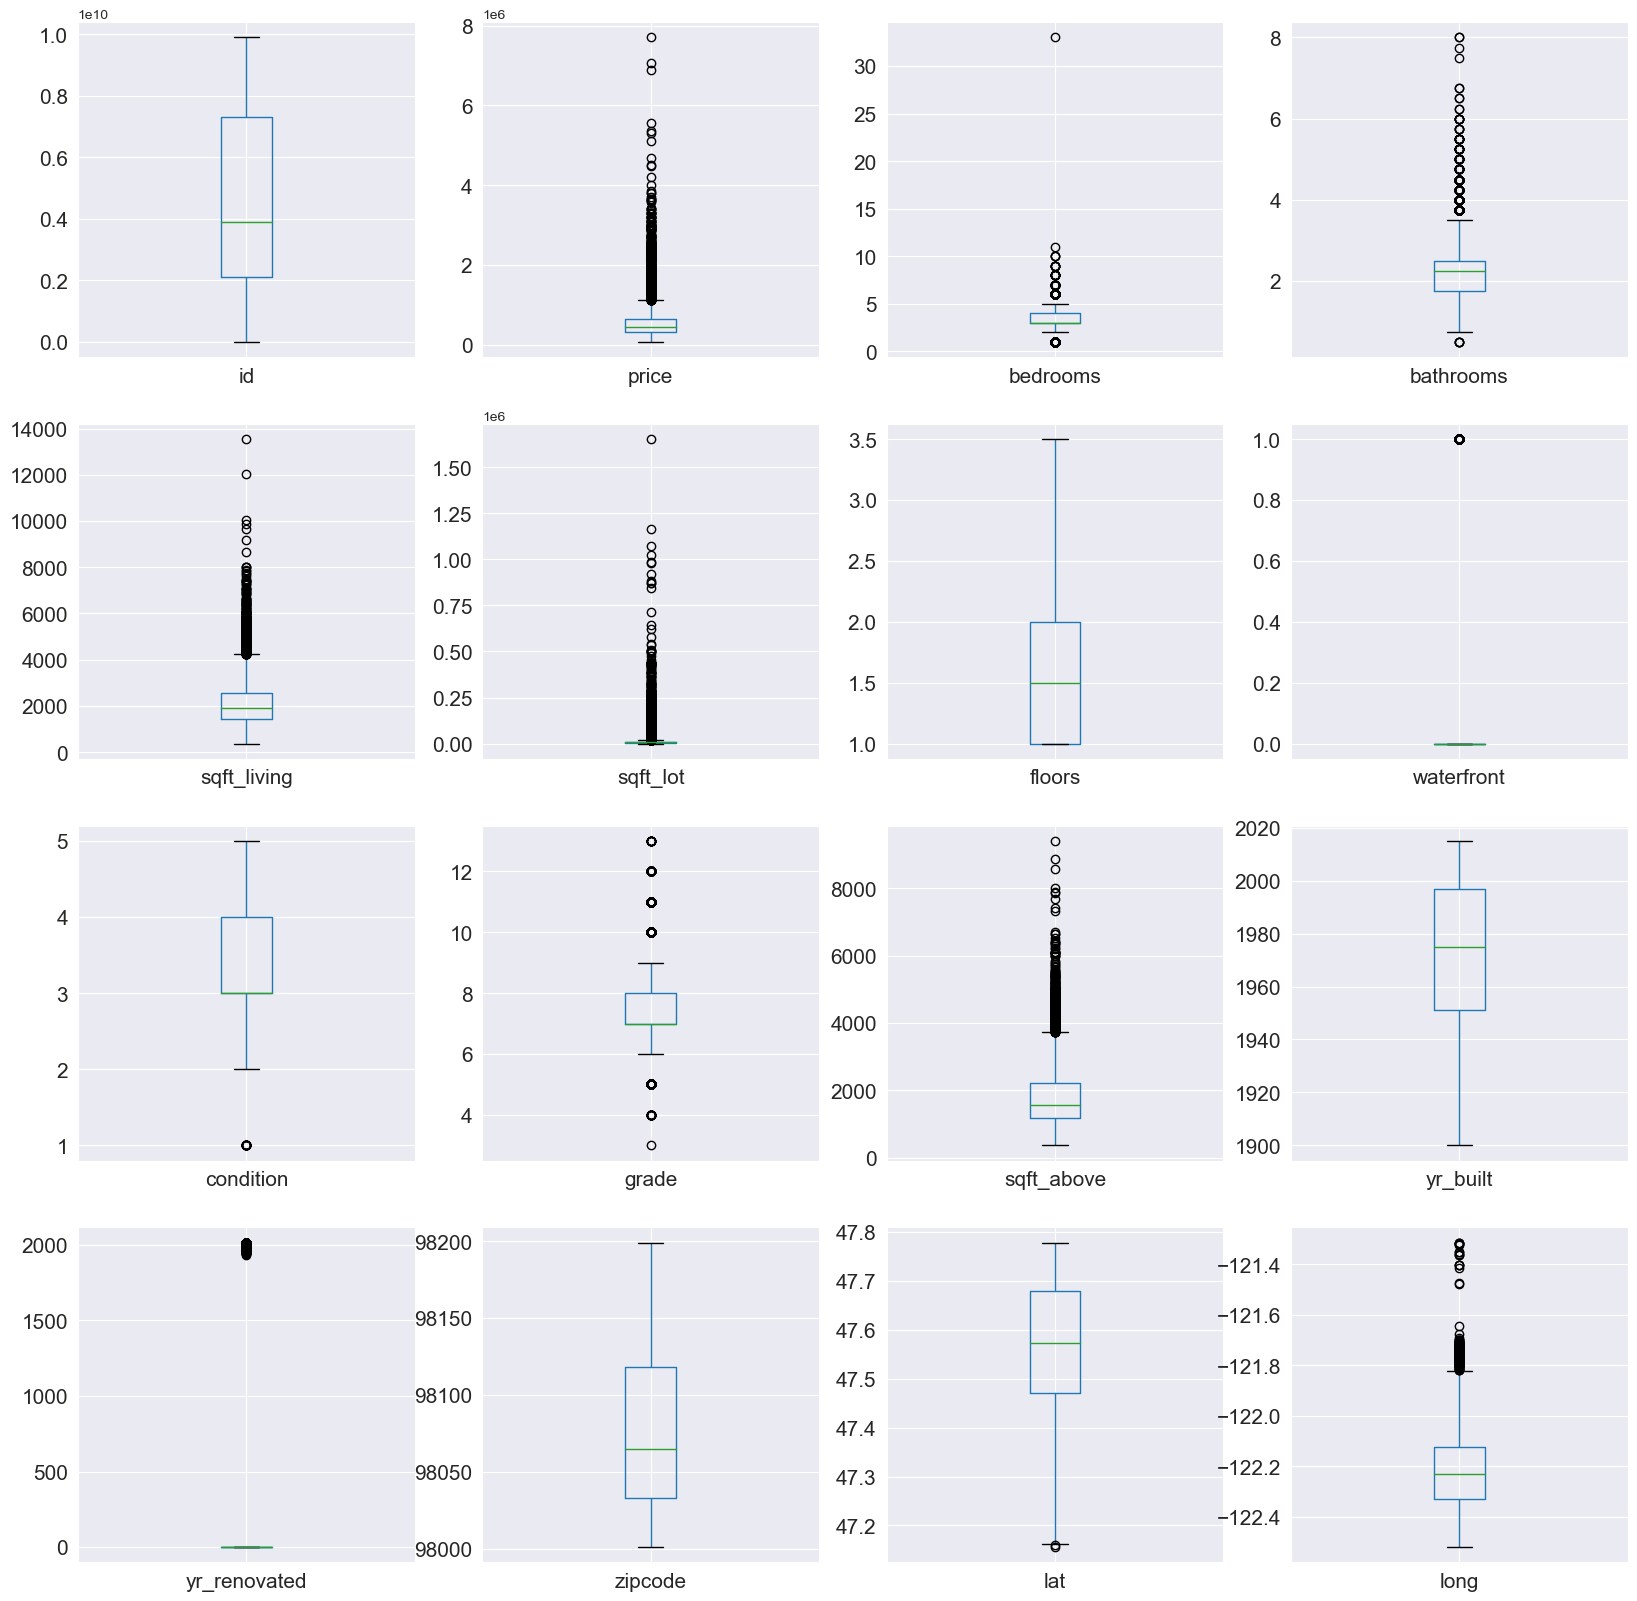

In [137]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize = (20,20))

index = 0
for row in range(len(axes)):
    for col in range(len(axes[row])):
        if index == len(cols_cont_df):
            break
        ax = axes[row][col]
        var = raw_df[[cols_cont_df[index]]]
        var.boxplot(fontsize = 15 , ax=ax)
        index += 1

Plotting individual boxplots allows to better see outliers as the different variables have differnt scaling.

Price appears to have many outliers. it would be necessary to see by how much the values deviate from the mean

In [138]:
# add dummied_df into raw_df 
raw_df = pd.concat([raw_df, dummies_df], axis = 1)
raw_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,98178,47.5112,-122.257,1340,5650,0,0,0,0,1
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,NONE,...,98125,47.7210,-122.319,1690,7639,1,0,0,0,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,NONE,...,98028,47.7379,-122.233,2720,8062,0,0,0,0,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,NONE,...,98136,47.5208,-122.393,1360,5000,1,0,0,0,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,NONE,...,98074,47.6168,-122.045,1800,7503,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,NONE,...,98103,47.6993,-122.346,1530,1509,0,0,0,0,1
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,NONE,...,98146,47.5107,-122.362,1830,7200,0,0,0,0,1
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,NONE,...,98144,47.5944,-122.299,1020,2007,0,0,0,0,1
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,NONE,...,98027,47.5345,-122.069,1410,1287,0,0,0,0,1


In [139]:
# view metrics of price
raw_df.price.describe().round()

count      21597.0
mean      540297.0
std       367368.0
min        78000.0
25%       322000.0
50%       450000.0
75%       645000.0
max      7700000.0
Name: price, dtype: float64

In [140]:
# calculate the mode to see skewness
raw_df.price.mode()

0    350000.0
1    450000.0
dtype: float64

In [141]:
raw_df.price.median()

450000.0

* The min. price is 78000 USD which is sensible.
* The 50th percentile is much lower at 450000 USD.
* The max. price 7,700,000 USD which may be an outlier as there are mansions as well in the dataset. This may need further investigation.
* The mean is much lower than this and as thus would be necessary to set a threshold over values of the price that would minimise deviation which is as well quite high.

* It would be necessary to deal with these outliers in the price.

Skewness:  4.023085207745834
Kurtosis:  34.53308449607733


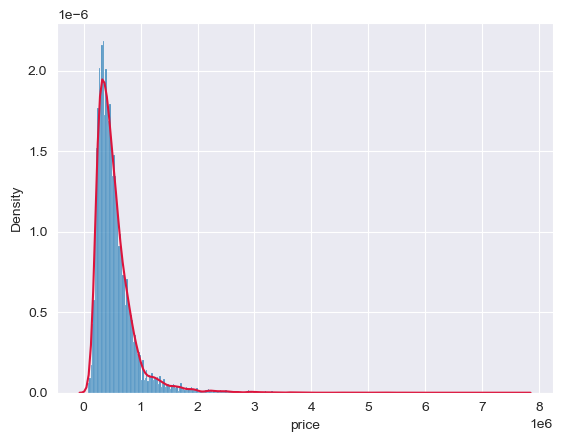

In [142]:
# plot histogram to see distribution and outliers in the `price` column
ax = sns.histplot(raw_df.price, kde=False, stat='density')
sns.kdeplot(data=raw_df, x="price", color='crimson', ax=ax)

print("Skewness: ", stats.skew(raw_df.price))
print("Kurtosis: ", stats.kurtosis(raw_df.price))

From the skinny distribution we can see that it would be incorrect to assume that the price is normally distributed. The leptokurtic distribution and high kurtosis of 34.53 means shows that there are outliers in the price column. 

It may be necessary to scale the price column. Implementing a Log Transform will help convert the leptokurtic distribtuion to a normal distribution.



Skewness:  0.43097424174908705
Kurtosis:  0.6906107356267648


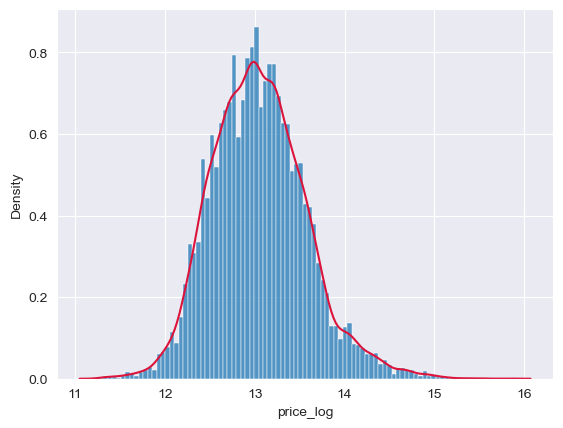

In [143]:
# overwrite the price column with the log price
raw_df['price_log'] = np.log(raw_df.price)

# plot the log price distribution to see if it became normal
ax = sns.histplot(raw_df.price_log, kde=False, stat='density')
sns.kdeplot(data=raw_df, x="price_log", color='crimson', ax=ax)

print("Skewness: ", stats.skew(raw_df.price_log))
print("Kurtosis: ", stats.kurtosis(raw_df.price_log))


<Axes: >

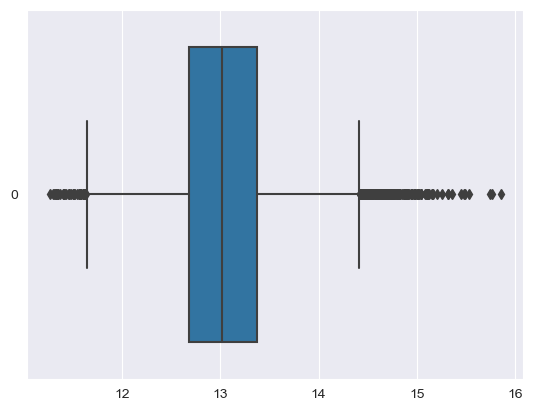

In [144]:
# boxplot to visualize noramlized price_log
sns.boxplot(raw_df.price_log, orient="h")

In [145]:
raw_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,has_basement,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,price_log
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,47.5112,-122.257,1340,5650,0,0,0,0,1,12.309982
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,NONE,...,47.7210,-122.319,1690,7639,1,0,0,0,1,13.195614
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,NONE,...,47.7379,-122.233,2720,8062,0,0,0,0,1,12.100712
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,NONE,...,47.5208,-122.393,1360,5000,1,0,0,0,1,13.311329
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,NONE,...,47.6168,-122.045,1800,7503,0,0,0,0,1,13.142166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,NONE,...,47.6993,-122.346,1530,1509,0,0,0,0,1,12.793859
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,NONE,...,47.5107,-122.362,1830,7200,0,0,0,0,1,12.899220
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,NONE,...,47.5944,-122.299,1020,2007,0,0,0,0,1,12.904459
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,NONE,...,47.5345,-122.069,1410,1287,0,0,0,0,1,12.899220


Log transforming the price column allowed to retain more data and price is now normally distributed as seen in the histogram.
Although the boxplot still shows presence of some outliers these can be accounted for perharps as:
* The left whisker can be seen as the prices of delapidated old houses that may be low in value. This can also be calculated by use of `yr_built`, `yr_renovated` and `date` (age of the house) to compare `condition`, `grade`, `price`

* The right whisker can be seen as the prices of Very expensive apartments/ mansions/ hotels/ commercial buildings 

Plot scatter matrix to see if the variables have relation to price_log, detect for ordinal data. We assume linearity of the varibales to the price.

In [146]:
# create df of continuous variables
cont_df = raw_df.select_dtypes(exclude = object)
# drop the dummied view columns as they are not numeric but categorical
cont_df.drop(["view_EXCELLENT", "view_FAIR", "view_GOOD", "view_NONE"], axis=1, inplace=True)
cont_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,price_log
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,0,12.309982
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,13.195614
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,3,6,770,1933,NaN,98028,47.7379,-122.233,2720,8062,0,12.100712
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,1,13.311329
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,0,13.142166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,3,8,1530,2009,0.0,98103,47.6993,-122.346,1530,1509,0,12.793859
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,3,8,2310,2014,0.0,98146,47.5107,-122.362,1830,7200,0,12.899220
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,3,7,1020,2009,0.0,98144,47.5944,-122.299,1020,2007,0,12.904459
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0,3,8,1600,2004,0.0,98027,47.5345,-122.069,1410,1287,0,12.899220


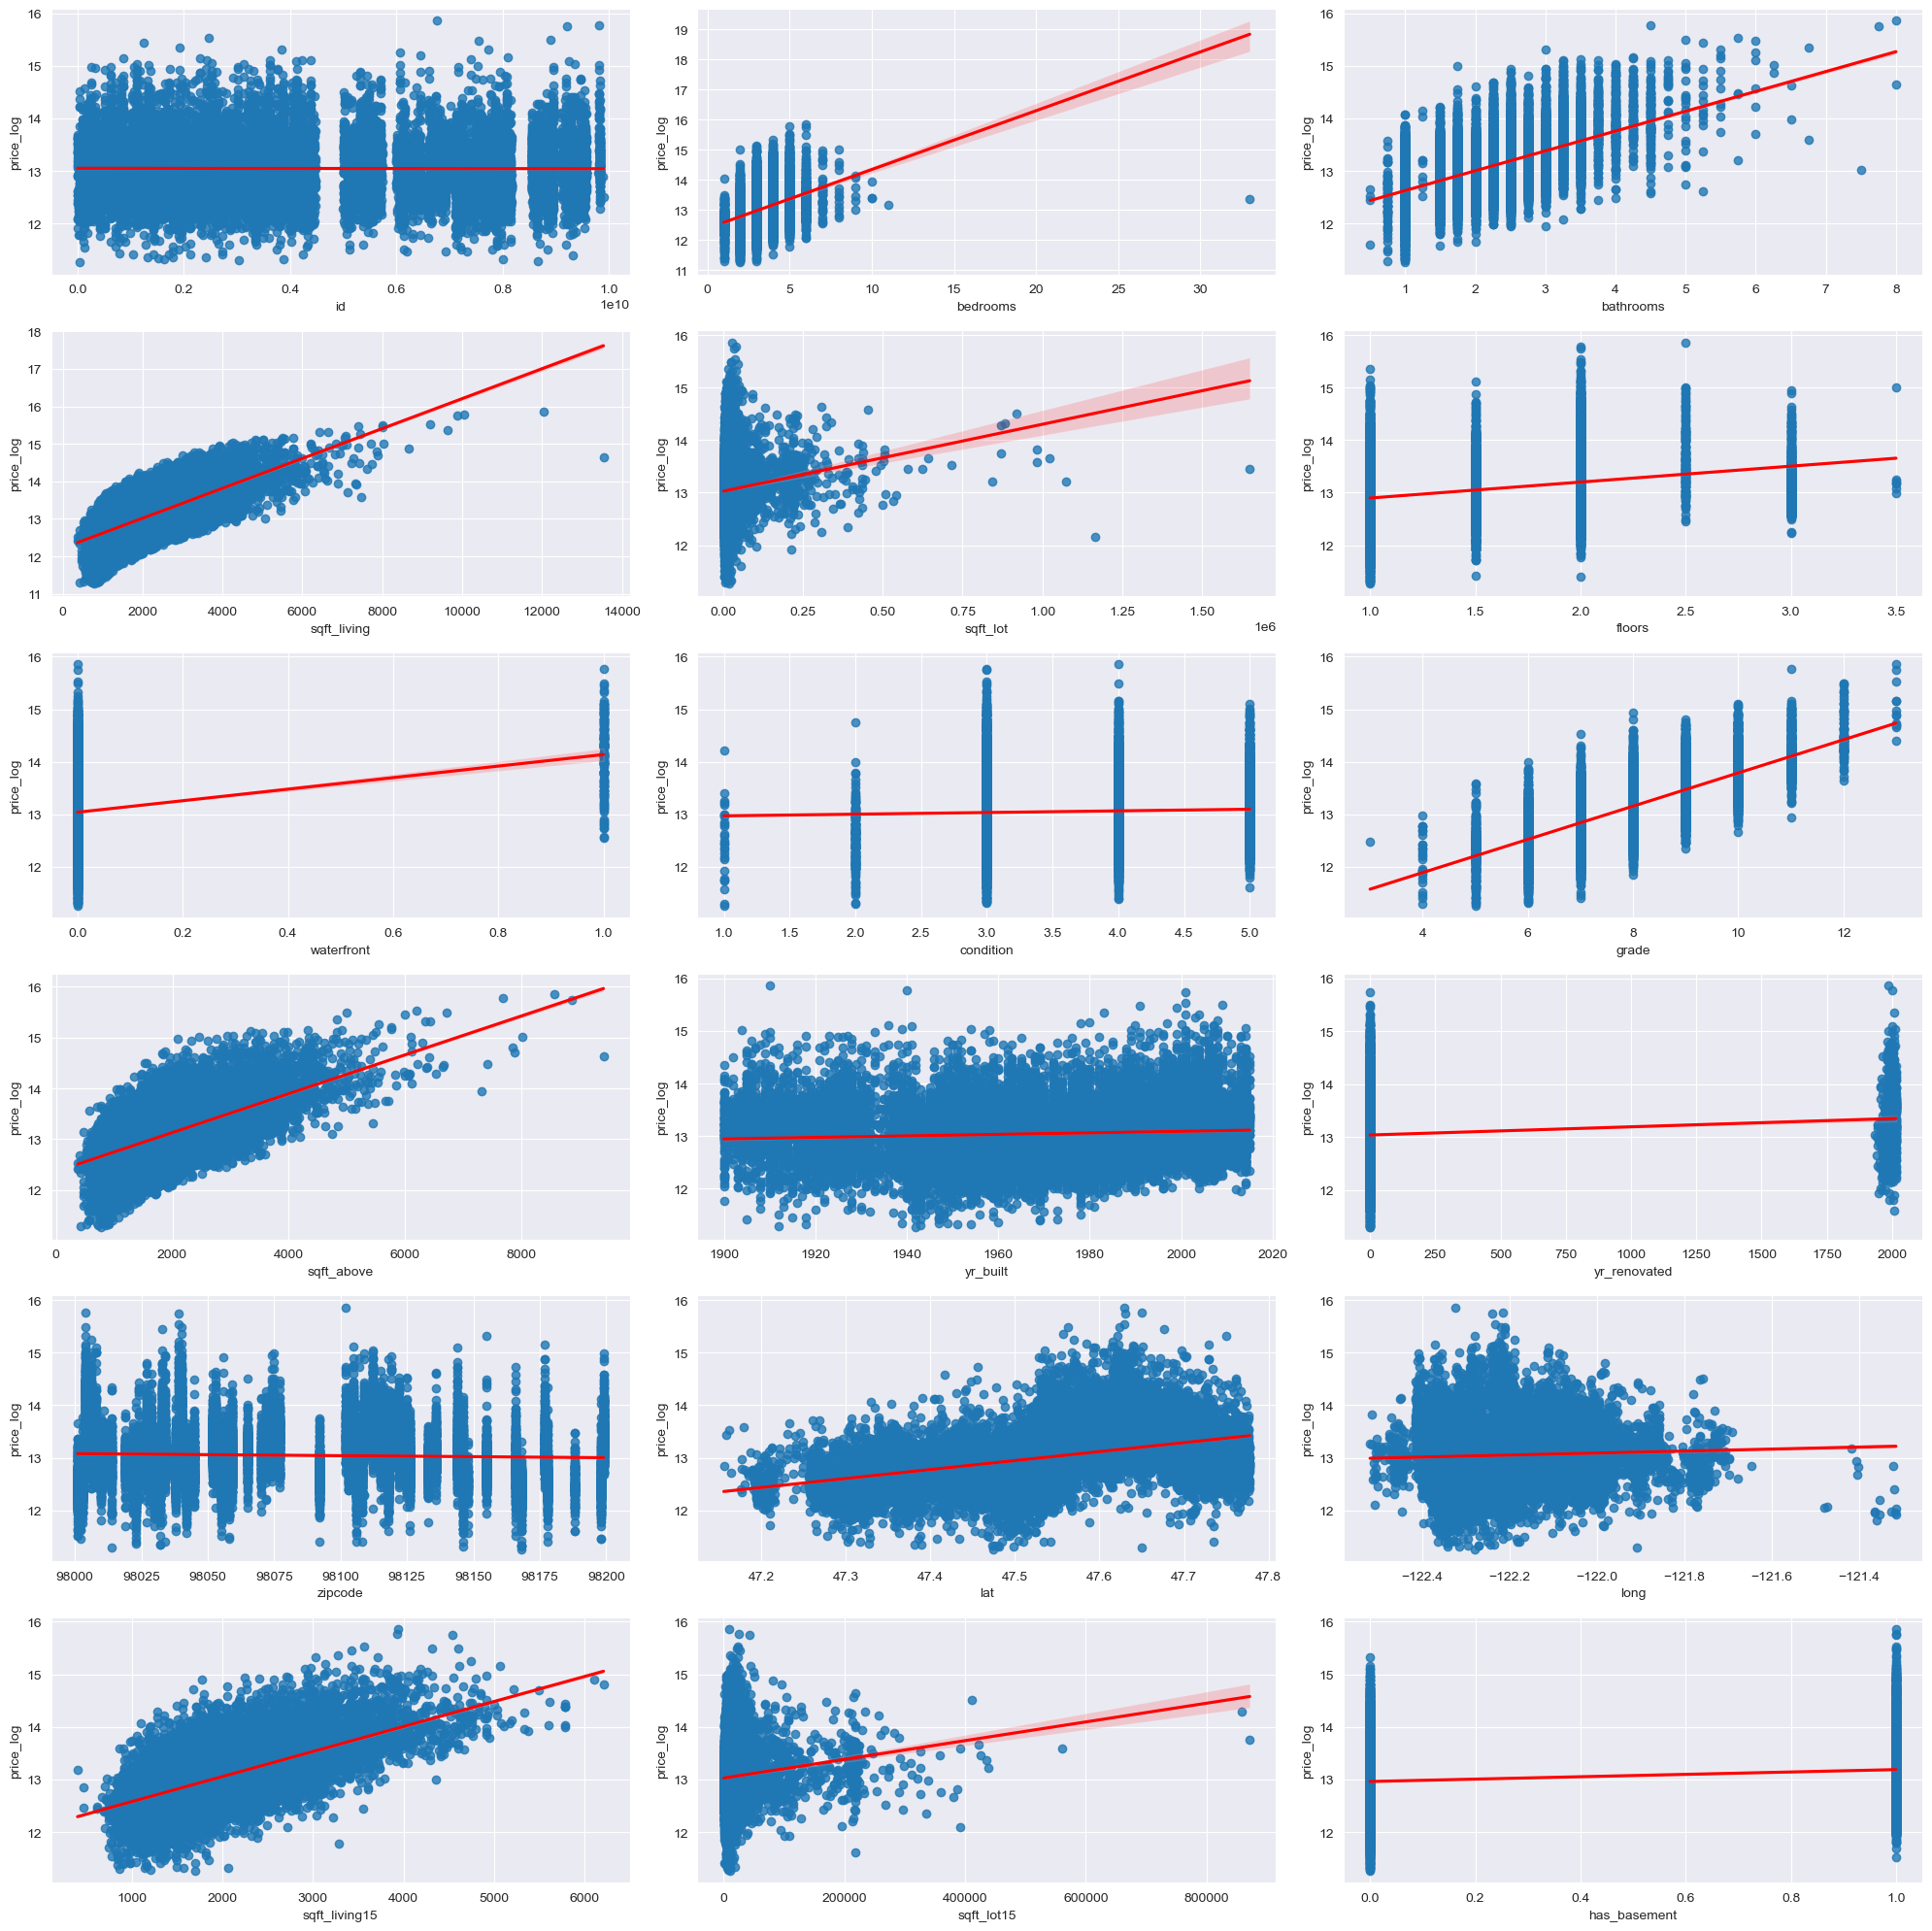

In [91]:
#looping over all columns  
plots = cont_df.drop(['price', 'price_log'], axis=1)

fig, axes = plt.subplots(ncols=3, nrows=6, figsize=(20, 20))
fig.set_tight_layout(True)

for index, col in enumerate(plots.columns):
    ax = axes[index//3][index%3]
    sns.regplot(x = col, y = 'price_log', data = cont_df, ax=ax, line_kws={'color':'red'})
    ax.set_xlabel(col)
    ax.set_ylabel("price_log")

The presence of outliers in a number of columns is evident in the scatter plot. Perharps they are the outliers still observed after price was log normalized and as well the whisker sof the boxplot of price_log.
We could drop these rows and see if this minimises all the outliers in the other columns.

In [92]:
# helper function to remove outliers
def remove_outliers(df, column):
    return df[(np.abs(stats.zscore(df[column])) < 3)]

# investigate repercussions of blanket outlier removal from price
all_price = len(raw_df["price_log"])
no_out = len(remove_outliers(raw_df, "price_log"))
lost = all_price-no_out

print(f'Price feature currently has {all_price} values.')
print(f'If outliers removed it will have {no_out}.')
print(f'That means {lost} would be removed, or {(round(lost/all_price, 2))*100}% dropped.')


Price feature currently has 21597 values.
If outliers removed it will have 21428.
That means 169 would be removed, or 1.0% dropped.


In [93]:
raw_df = remove_outliers(raw_df, "price_log")
raw_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,has_basement,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,price_log
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,47.5112,-122.257,1340,5650,0,0,0,0,1,12.309982
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,NONE,...,47.7210,-122.319,1690,7639,1,0,0,0,1,13.195614
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,NONE,...,47.7379,-122.233,2720,8062,0,0,0,0,1,12.100712
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,NONE,...,47.5208,-122.393,1360,5000,1,0,0,0,1,13.311329
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,NONE,...,47.6168,-122.045,1800,7503,0,0,0,0,1,13.142166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,NONE,...,47.6993,-122.346,1530,1509,0,0,0,0,1,12.793859
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,NONE,...,47.5107,-122.362,1830,7200,0,0,0,0,1,12.899220
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,NONE,...,47.5944,-122.299,1020,2007,0,0,0,0,1,12.904459
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,NONE,...,47.5345,-122.069,1410,1287,0,0,0,0,1,12.899220


<Axes: >

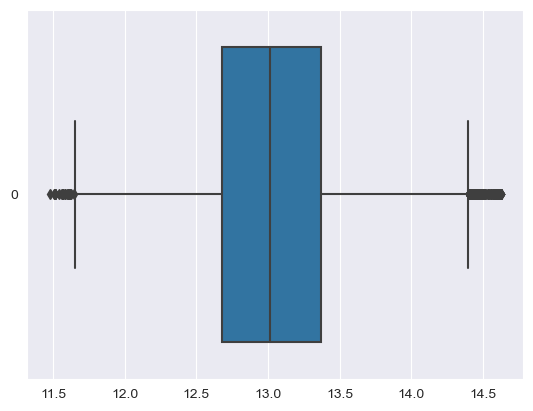

In [94]:
sns.boxplot(raw_df.price_log, orient="h")

In [95]:
# drop columns
raw_df.drop(['id', 'date',"price",'yr_built', 'zipcode', 'yr_renovated', 'lat', 'long', "view"], axis=1, inplace=True)
raw_df


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_living15,sqft_lot15,has_basement,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,price_log
0,3,1.00,1180,5650,1.0,0,3,7,1180,1340,5650,0,0,0,0,1,12.309982
1,3,2.25,2570,7242,2.0,0,3,7,2170,1690,7639,1,0,0,0,1,13.195614
2,2,1.00,770,10000,1.0,0,3,6,770,2720,8062,0,0,0,0,1,12.100712
3,4,3.00,1960,5000,1.0,0,5,7,1050,1360,5000,1,0,0,0,1,13.311329
4,3,2.00,1680,8080,1.0,0,3,8,1680,1800,7503,0,0,0,0,1,13.142166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,3,8,1530,1530,1509,0,0,0,0,1,12.793859
21593,4,2.50,2310,5813,2.0,0,3,8,2310,1830,7200,0,0,0,0,1,12.899220
21594,2,0.75,1020,1350,2.0,0,3,7,1020,1020,2007,0,0,0,0,1,12.904459
21595,3,2.50,1600,2388,2.0,0,3,8,1600,1410,1287,0,0,0,0,1,12.899220


With the cleaned price dataframe we test the assumptions of linear regression.
1. Linearity - there should be a relationship between independent and dependent varibales
2. Normal distribution of error term
3. Homoscedacity - constant error variance i.e the variance of the error term is same across all the independent varibales
4. No multicollinearity - independent variables are not correlated.

Next we create a copy of the raw_df to deal with the other numerical variables the sqft variables. There is a significant gap in scaling which may afect results it would be necessary to transform these numerical variables following the linear regression assumption of homoscedacity of variables.

In [96]:
raw_df_copy = raw_df.copy()

In [97]:
# another dataframe with numerical variables with log transformation
log_vars = ["log_sqft_above", "log_sqft_living", "log_sqft_lot", "log_sqft_living15", "log_sqft_lot15"]

# log transforming
raw_df_copy[log_vars] = np.log(raw_df[["sqft_above", "sqft_living", "sqft_lot", "sqft_living15", "sqft_lot15"]])

# drop the untransformed variables
raw_df_copy.drop(["sqft_above", "sqft_living", "sqft_lot", "sqft_living15", "sqft_lot15"], axis=1, inplace=True)
raw_df_copy

,bedrooms,bathrooms,floors,waterfront,condition,grade,has_basement,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,price_log,log_sqft_above,log_sqft_living,log_sqft_lot,log_sqft_living15,log_sqft_lot15
0,3,1.00,1.0,0,3,7,0,0,0,0,1,12.309982,7.073270,7.073270,8.639411,7.200425,8.639411
1,3,2.25,2.0,0,3,7,1,0,0,0,1,13.195614,7.682482,7.851661,8.887653,7.432484,8.941022
2,2,1.00,1.0,0,3,6,0,0,0,0,1,12.100712,6.646391,6.646391,9.210340,7.908387,8.994917
3,4,3.00,1.0,0,5,7,1,0,0,0,1,13.311329,6.956545,7.580700,8.517193,7.215240,8.517193
4,3,2.00,1.0,0,3,8,0,0,0,0,1,13.142166,7.426549,7.426549,8.997147,7.495542,8.923058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,0,3,8,0,0,0,0,1,12.793859,7.333023,7.333023,7.030857,7.333023,7.319202
21593,4,2.50,2.0,0,3,8,0,0,0,0,1,12.899220,7.745003,7.745003,8.667852,7.512071,8.881836
21594,2,0.75,2.0,0,3,7,0,0,0,0,1,12.904459,6.927558,6.927558,7.207860,6.927558,7.604396
21595,3,2.50,2.0,0,3,8,0,0,0,0,1,12.899220,7.377759,7.377759,7.778211,7.251345,7.160069


### Multicollinearity test

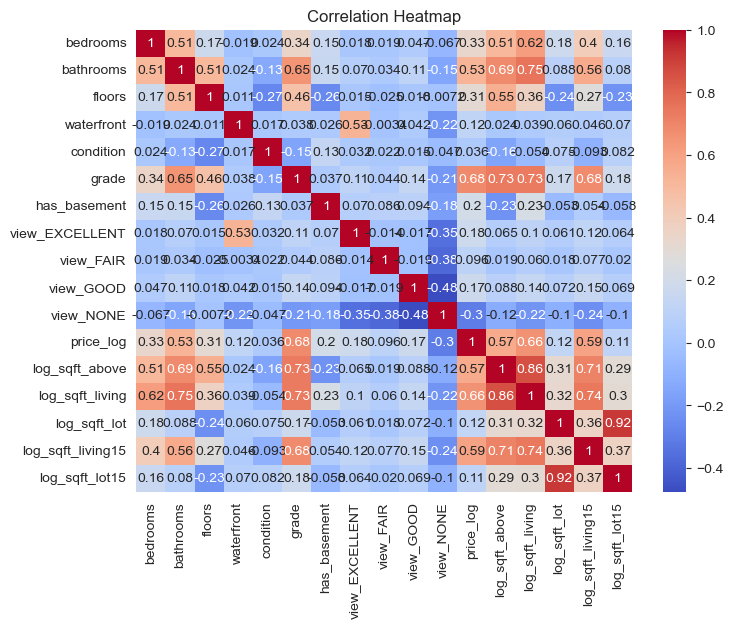

In [98]:
# multicollinearity test for varinace inflation factor
plt.figure(figsize=(8, 6))
sns.heatmap(raw_df_copy.corr(), cmap='coolwarm', annot=True, cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [99]:
# collinearity check function
# code from Multicollinearity of Features - Lab, turned it into a function

def collinearity(df):
    #get absolute value of correlations, sort them, and turn into new DF called df
    df=df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

    # zip the columns (Which were only named level_0 and level_1 by default) 
    # into a new column named "pairs"
    df['pairs'] = list(zip(df.level_0, df.level_1))

    # set index to pairs
    df.set_index(['pairs'], inplace = True)

    # drop level_ columns
    df.drop(columns=['level_1', 'level_0'], inplace = True)

    # rename correlation column as cc rather than 0
    df.columns = ['cc']

    # just correlations over .75, but less than 1.
    df = df[(df.cc>.75) & (df.cc <1)]

    df.drop_duplicates(inplace=True) 

    return df

collinearity(raw_df_copy)

,cc
pairs,
"(log_sqft_lot15, log_sqft_lot)",0.918728
"(log_sqft_above, log_sqft_living)",0.860153
"(bathrooms, log_sqft_living)",0.753990


Multicollinearity highlights that:
* (log_sqft_lot15, log_sqft_lot)
* (log_sqft_living, log_sqft_above)
* (log_sqft_living, bathrooms)

are related. May be necessary to drop one of each pair of correlated independent variables.


### Final cleaned dataset

### Modelling

In [100]:
# see correlation between parameters and price
# helps to select the baseline model
corr_matrix = raw_df_copy.corr()
corr_matrix['price_log'].sort_values(ascending=False)

price_log            1.000000
grade                0.684184
log_sqft_living      0.657333
log_sqft_living15    0.594749
log_sqft_above       0.566757
bathrooms            0.526639
bedrooms             0.329087
floors               0.307804
has_basement         0.199634
view_EXCELLENT       0.180596
view_GOOD            0.169861
log_sqft_lot         0.124275
waterfront           0.115981
log_sqft_lot15       0.110247
view_FAIR            0.095502
condition            0.036036
view_NONE           -0.303286
Name: price_log, dtype: float64

we opt to use the sqft_living as it has high correlation to the price of a property.
We dont use grade as it was a categorical variable

In [101]:
raw_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21428 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bedrooms           21428 non-null  int64  
 1   bathrooms          21428 non-null  float64
 2   floors             21428 non-null  float64
 3   waterfront         21428 non-null  int64  
 4   condition          21428 non-null  int64  
 5   grade              21428 non-null  int64  
 6   has_basement       21428 non-null  int64  
 7   view_EXCELLENT     21428 non-null  uint8  
 8   view_FAIR          21428 non-null  uint8  
 9   view_GOOD          21428 non-null  uint8  
 10  view_NONE          21428 non-null  uint8  
 11  price_log          21428 non-null  float64
 12  log_sqft_above     21428 non-null  float64
 13  log_sqft_living    21428 non-null  float64
 14  log_sqft_lot       21428 non-null  float64
 15  log_sqft_living15  21428 non-null  float64
 16  log_sqft_lot15     214

#### Model 1: Price in relation to sqft_living.

In [102]:
#create baseline model
f = 'price_log ~ log_sqft_living'
baseline_model = ols(formula=f, data=raw_df_copy).fit()

print(baseline_model.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                 1.630e+04
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:54:54   Log-Likelihood:                -9622.7
No. Observations:               21428   AIC:                         1.925e+04
Df Residuals:                   21426   BIC:                         1.927e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.0424      0.047    1

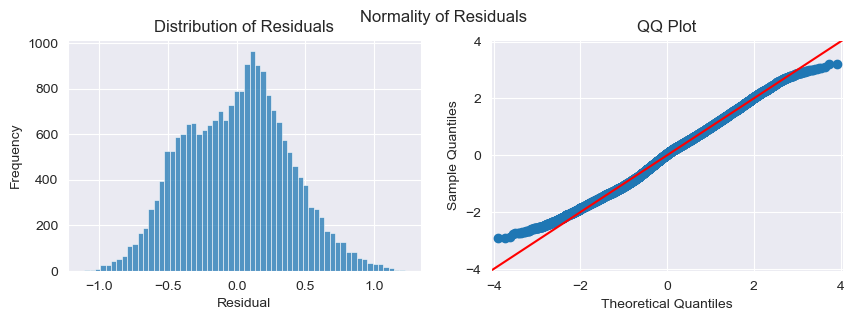

r_sq: 0.43208631795102925. r_sq_adjusted: 0.4320598121318354. k_fold_r: 0.4319787829640019


,coef,std err,t,P>|t|,[0.025,0.975]
const,7.0424,0.047,149.758,0.000,6.950,7.135
log_sqft_living,0.7946,0.006,127.678,0.000,0.782,0.807


In [103]:
# function to return r_squared values, coeff /p table from .summary, and a 
# couple of residual normality checks (hist and qq plot)

def model_it(df, target):
    y = df[target]
    X = df.drop(target, axis=1)
    #statsmodel fit
    model = sm.OLS(y, sm.add_constant(X)).fit()  
    
    #kfold
    regression = LinearRegression()
    crossvalidation = KFold(n_splits=3, shuffle=True, random_state=1)
    kfold_r = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))
    
    #PLOTS
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3))
    fig.suptitle('Normality of Residuals')
    #hist
    sns.histplot(model.resid, ax=ax0)
    ax0.set(xlabel='Residual', ylabel='Frequency', title='Distribution of Residuals')
    #qq
    sm.qqplot(model.resid, fit = True, line = '45', ax=ax1)
    ax1.set(title='QQ Plot')
    plt.show()
    
    #print r_squared values
    print(f'r_sq: {model.rsquared}. r_sq_adjusted: {model.rsquared_adj}. k_fold_r: {kfold_r}')
    
    #return 
    return model.summary().tables[1]

basemodel_df = raw_df_copy[["log_sqft_living", "price_log"]]

model_it(basemodel_df, "price_log")


Reporting on Assumptions of Linear Regression
--------------------------------------------- 

Assumption 1: Independence of Residuals
---------------------------------------------
Evaluated by Durbin-Watson Score between 1.5 and 2.5
Score: 1.9769999999999999	Assumption: passed. 

Assumption 2: Normal Distribution of Residuals
---------------------------------------------


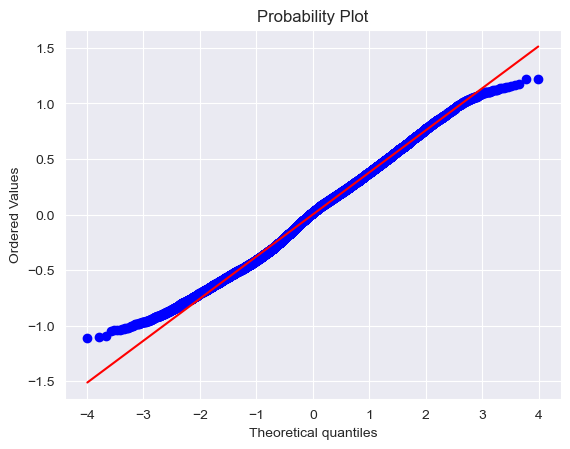

Assumption 3: Homoscedasticity in Residuals
---------------------------------------------


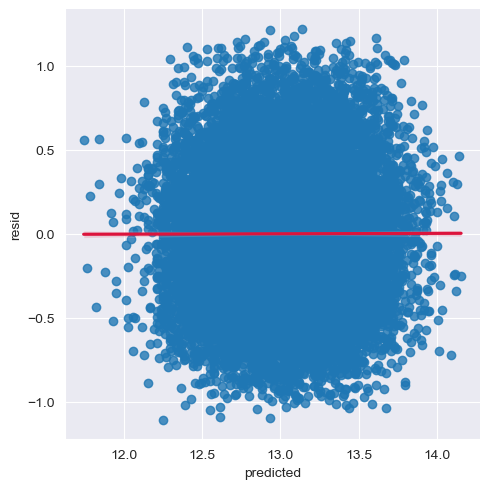

In [104]:
def assumptions(model):

    # this other helper function within the assumptions checker was sourced
    # from https://stackoverflow.com/questions/51734180/converting-statsmodels
    #-summary-object-to-pandas-dataframe
    # It takes in a model and outputs a dictionary with which you can pull
    # values from the summary
    def get_metrics(res):

        model_results_df = []
        coefficient_df = None
        for i, tab in enumerate(res.summary().tables):
            header, index_col = None, None
            if i == 1:
                coefficient_df = pd.read_html(tab.as_html(), header=0, index_col=0)[0]
            else:
                df = pd.read_html(tab.as_html())[0]
                model_results_df += [df.iloc[:,0:2], df.iloc[:,2:4]]

        model_results_df = pd.DataFrame(np.concatenate(model_results_df), columns=['metric', 'value'])
        model_results_df.dropna(inplace=True, axis=0)
        model_results_df.metric = model_results_df.metric.apply(lambda x : x.lower().replace(' (', '_')
                                                                .replace('.', '').replace('(', '_')
                                                                .replace(')', '').replace('-', '_')
                                                               .replace(':', '').replace(' ', '_'))

        res_dict = dict(zip(model_results_df.metric.values, model_results_df.value.values))
        return res_dict
    
    metrics = get_metrics(model)
    
    testing_df = pd.DataFrame()
    testing_df['predicted'] = model.predict()
    testing_df['resid'] = model.resid
    
    durbin_watson = metrics['durbin_watson']
    if ((durbin_watson >= 1.5) & (durbin_watson <= 2.5)):
        dw_passes = 'passed'
    else:
        dw_passes = 'failed'
    
    print('Reporting on Assumptions of Linear Regression')
    print('---------------------------------------------', '\n')

    print('Assumption 1: Independence of Residuals')
    print('---------------------------------------------')
    print('Evaluated by Durbin-Watson Score between 1.5 and 2.5')
    print(f'Score: {durbin_watson}\tAssumption: {dw_passes}.', '\n')
    
    print('Assumption 2: Normal Distribution of Residuals')
    print('---------------------------------------------')
    from scipy import stats
    stats.probplot(model.resid, dist='norm', plot=plt)
    plt.show()
    print('Assumption 3: Homoscedasticity in Residuals')
    print('---------------------------------------------')
    sns.lmplot(data=testing_df, x='predicted', y='resid', line_kws={'color': 'crimson'})
    plt.show();


assumptions(baseline_model)

##### Model 1 Results: Sqft_living in relation to price
Looking at the summary above.

For every 1% increase in the sqft_living, the price increase by about 0.80%
                
Our y intercept in Model 1 is 7.0424

The baseline_model follows assumptions of linear regression.

#### Model 2: MultiLinear regression


In [105]:
raw_df_copy.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade',
       'has_basement', 'view_EXCELLENT', 'view_FAIR', 'view_GOOD', 'view_NONE',
       'price_log', 'log_sqft_above', 'log_sqft_living', 'log_sqft_lot',
       'log_sqft_living15', 'log_sqft_lot15'],
      dtype='object')

In [106]:

# create multimodel
f = 'price_log ~ log_sqft_living + bathrooms + bedrooms + floors + waterfront + condition + grade + has_basement + view_EXCELLENT + view_FAIR + view_GOOD + view_NONE + log_sqft_above + log_sqft_living + log_sqft_lot + log_sqft_living15 + log_sqft_lot15'
second_model = ols(formula=f, data=raw_df_copy).fit()
print(second_model.summary())


                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     1865.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:55:00   Log-Likelihood:                -6332.7
No. Observations:               21428   AIC:                         1.270e+04
Df Residuals:                   21411   BIC:                         1.283e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.7255      0.07

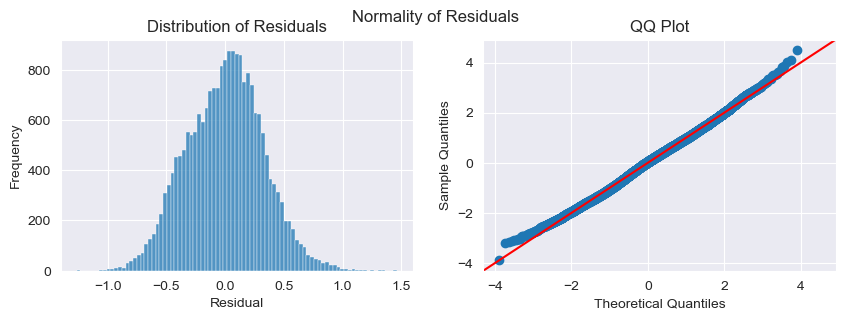

r_sq: 0.582245080876928. r_sq_adjusted: 0.5819329012166612. k_fold_r: 0.5813427699231747


,coef,std err,t,P>|t|,[0.025,0.975]
const,7.7255,0.078,99.650,0.000,7.574,7.878
bedrooms,-0.0184,0.003,-5.762,0.000,-0.025,-0.012
bathrooms,-0.0276,0.005,-5.481,0.000,-0.037,-0.018
floors,0.0309,0.006,4.895,0.000,0.019,0.043
waterfront,0.3374,0.037,9.116,0.000,0.265,0.410
condition,0.0973,0.004,26.989,0.000,0.090,0.104
grade,0.1790,0.003,54.092,0.000,0.173,0.186
has_basement,0.1234,0.009,13.484,0.000,0.105,0.141
view_EXCELLENT,0.1658,0.026,6.439,0.000,0.115,0.216
view_FAIR,0.0563,0.021,2.676,0.007,0.015,0.098


In [107]:

model_it(raw_df_copy, "price_log")

Reporting on Assumptions of Linear Regression
--------------------------------------------- 

Assumption 1: Independence of Residuals
---------------------------------------------
Evaluated by Durbin-Watson Score between 1.5 and 2.5
Score: 1.9709999999999999	Assumption: passed. 

Assumption 2: Normal Distribution of Residuals
---------------------------------------------


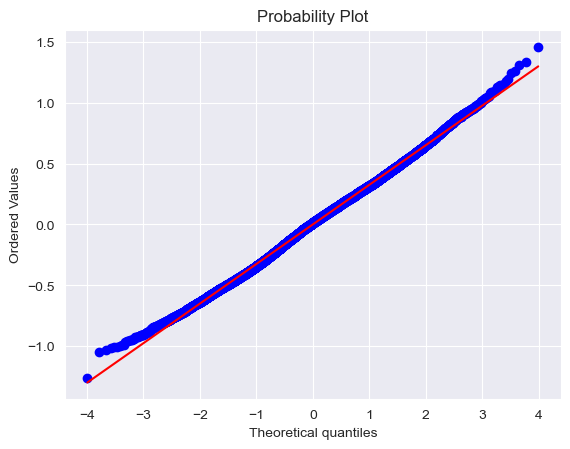

Assumption 3: Homoscedasticity in Residuals
---------------------------------------------


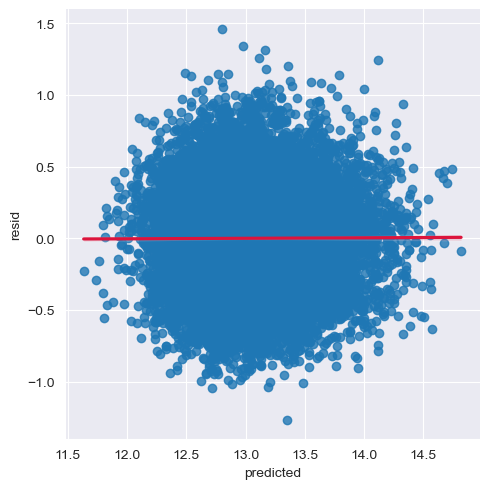

In [108]:
# check if the line follow linear regression assumption
assumptions(second_model)

##### Model 2 results: Multi Linear Regression Results
The addition of more features allowed for a bettwer fitted predicted line for the data. 
FRom the Adjusted R_squared of 0.582 we see that the independent variables contribute to 58.2 % change in the price. 
Prob(F-statistic) claims that it is accurate the varibales effect is 0
From the low p-values(below 0.05) we can deduce that all the coeffients measured have an effect on price.
Kurtosis is <3 so we can assume normalcy of the distribution


#### Model 3: Zipcode/ Location


In [147]:
# load the data again
raw_df2 = pd.read_csv('data/kc_house_data.csv')

# price_log_column = raw_df2["zipcode"]

zipcode_df = pd.DataFrame()
# zipcode_df = zipcode_df(price_log_column)
zipcode_df["zipcode"] = raw_df2["zipcode"]
zipcode_df["price"] = raw_df2["price"]
zipcode_df["waterfront"] = raw_df_copy["waterfront"]
zipcode_df["grade"] = raw_df_copy["grade"]
zipcode_df["condition"] = raw_df_copy["condition"]
zipcode_df["log_sqft_living"] = raw_df_copy["log_sqft_living"]
zipcode_df["log_sqft_living15"] = raw_df_copy["log_sqft_living15"]


zipcode_df.zipcode.nunique()



70

There at 70 different zipcode values in our dataset. We want to try and create a new feature that takes zipcodes and matches them up with cities in our area.

In [148]:
# https://zipdatamaps.com/king-wa-county-zipcodes
zip_city = pd.read_csv('data\zip_city.csv')

zipcode_df = pd.merge(left=zipcode_df, right=zip_city, on='zipcode', how='left')

zipcode_df can be merged into the larger dataframe to associate a home with a city instead of just a zipcode.

Let's explore this a bit more.

In [149]:
homes_by_zip = zipcode_df.groupby('city').count()

homes_by_zip.reset_index(inplace=True)

In [150]:
homes_by_zip.sort_values('zipcode', ascending=False)

,city,zipcode,price,waterfront,grade,condition,log_sqft_living,log_sqft_living15
20,Seattle,8973,8973,8911,8911,8911,8911,8911
18,Renton,1597,1597,1595,1595,1595,1595,1595
1,Bellevue,1407,1407,1363,1363,1363,1363,1363
11,Kent,1201,1201,1199,1199,1199,1199,1199
12,Kirkland,977,977,964,964,964,964,964
17,Redmond,977,977,976,976,976,976,976
0,Auburn,911,911,909,909,909,909,909
19,Sammamish,800,800,795,795,795,795,795
8,Federal Way,779,779,777,777,777,777,777
9,Issaquah,733,733,731,731,731,731,731


Our 70 zipcodes might be condensed down to 24 cities for OneHotEncoding. Seattle is the most often occurring city in the statistics, which is not surprising given that it is the biggest city in the state, much alone the county and may be the best candidate to drop.
The names of the cities associated with each area were published on the webpage where we discovered the data about them. Following the creation of lists for each area, we had to determine which cities in our data were not included on the website and accurately allocate them.

In [151]:
north = ['Bothell', 'Kenmore', 'Woodinville']
east = ['Bellevue', 'Carnation', 'Duvall', 'Issaquah', 'Kirkland', 'Medina',
        'Mercer Island', 'North Bend', 'Redmond', 'Sammamish']
south = ['Auburn', 'Enumclaw', 'Federal Way', 'Kent', 'Maple Valley',
         'Renton', 'Vashon']

In [152]:
region_cities = sorted(north + east + south)
data_cities = sorted(list(homes_by_zip.city))

missing_cities = []
for city in data_cities:
    if city not in region_cities:
        missing_cities.append(city)
        
missing_cities

['Black Diamond', 'Fall City', 'Seattle', 'Snoqualmie']

Seattle will be its own region, but we had to do a bit of map checking to place the three cities we had from our zipcode mapping that were not mentioned on the website discussing the 4 regions of the county.

In [153]:
south.extend(['Black Diamond'])
east.extend(['Fall City', 'Snoqualmie'])

def assignRegion(df):
    if df.city == 'Seattle':
        return 'Seattle'
    elif df.city in north:
        return 'north'
    elif df.city in east:
        return 'east'
    else:
        return 'south'

zipcode_df['region'] = zipcode_df.apply(assignRegion, axis=1)
zipcode_df.head()

,zipcode,price,waterfront,grade,condition,log_sqft_living,log_sqft_living15,city,region
0,98178,221900.0,0.0,7.0,3.0,7.073270,7.200425,Seattle,Seattle
1,98125,538000.0,0.0,7.0,3.0,7.851661,7.432484,Seattle,Seattle
2,98028,180000.0,0.0,6.0,3.0,6.646391,7.908387,Kenmore,north
3,98136,604000.0,0.0,7.0,5.0,7.580700,7.215240,Seattle,Seattle
4,98074,510000.0,0.0,8.0,3.0,7.426549,7.495542,Sammamish,east


Next it maybe necessary to create dumies of the `region` column to be able to use it.

In [154]:
zipcode_cols = zipcode_df[["region"]]

# 8. pd.get_dummies(dummies_df, drop_first=True)
zipcode_dummies = pd.get_dummies(zipcode_cols, drop_first=True)

# add column back into zipcode df
# add dummied_df into raw_df 
zipcode_df = pd.concat([zipcode_df, zipcode_dummies], axis = 1)

zipcode_df


,zipcode,price,waterfront,grade,condition,log_sqft_living,log_sqft_living15,city,region,region_east,region_north,region_south
0,98178,221900.0,0.0,7.0,3.0,7.073270,7.200425,Seattle,Seattle,0,0,0
1,98125,538000.0,0.0,7.0,3.0,7.851661,7.432484,Seattle,Seattle,0,0,0
2,98028,180000.0,0.0,6.0,3.0,6.646391,7.908387,Kenmore,north,0,1,0
3,98136,604000.0,0.0,7.0,5.0,7.580700,7.215240,Seattle,Seattle,0,0,0
4,98074,510000.0,0.0,8.0,3.0,7.426549,7.495542,Sammamish,east,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,98103,360000.0,0.0,8.0,3.0,7.333023,7.333023,Seattle,Seattle,0,0,0
21593,98146,400000.0,0.0,8.0,3.0,7.745003,7.512071,Seattle,Seattle,0,0,0
21594,98144,402101.0,0.0,7.0,3.0,6.927558,6.927558,Seattle,Seattle,0,0,0
21595,98027,400000.0,0.0,8.0,3.0,7.377759,7.251345,Issaquah,east,1,0,0


Need to work on outliers in the zipcode_df

Price feature currently has 21597 values.
If outliers removed it will have 21428.
That means 169 would be removed, or 1.0% dropped.


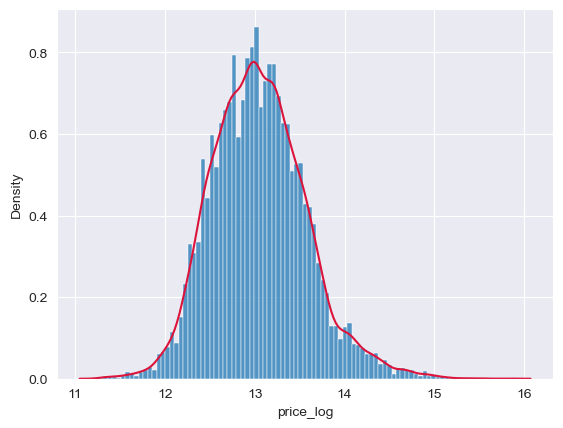

In [155]:
# overwrite the price column with the log price
zipcode_df['price_log'] = np.log(zipcode_df.price)

# plot the log price distribution to see if it became normal
ax = sns.histplot(zipcode_df.price_log, kde=False, stat='density')
sns.kdeplot(data=zipcode_df, x="price_log", color='crimson', ax=ax)

# investigate repercussions of blanket outlier removal from price
all_price = len(zipcode_df["price_log"])
no_out = len(remove_outliers(zipcode_df, "price_log"))
lost = all_price-no_out

print(f'Price feature currently has {all_price} values.')
print(f'If outliers removed it will have {no_out}.')
print(f'That means {lost} would be removed, or {(round(lost/all_price, 2))*100}% dropped.')

# remove the outliers
zipcode_df = remove_outliers(zipcode_df, "price_log")

Maybe we can look for a the relaionship between the location and size to the price.

In [156]:

# create multimodel
f = 'price_log ~ log_sqft_living + region_east + region_north + region_south + log_sqft_living15'
zipcode_model = ols(formula=f, data=zipcode_df).fit()
print(zipcode_model.summary())


                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     8049.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:04:54   Log-Likelihood:                -4356.5
No. Observations:               21428   AIC:                             8725.
Df Residuals:                   21422   BIC:                             8773.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.7589      0.05

Reporting on Assumptions of Linear Regression
--------------------------------------------- 

Assumption 1: Independence of Residuals
---------------------------------------------
Evaluated by Durbin-Watson Score between 1.5 and 2.5
Score: 1.984	Assumption: passed. 

Assumption 2: Normal Distribution of Residuals
---------------------------------------------


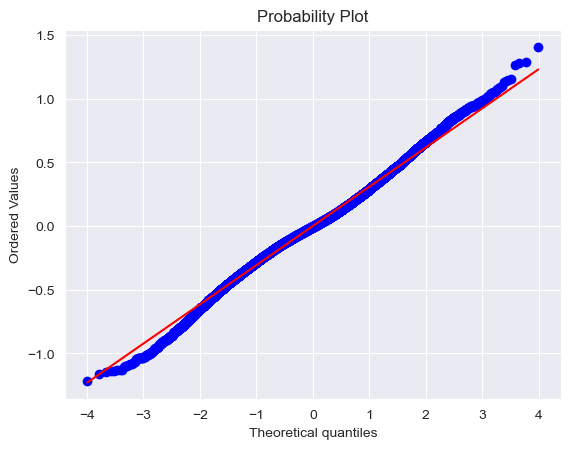

Assumption 3: Homoscedasticity in Residuals
---------------------------------------------


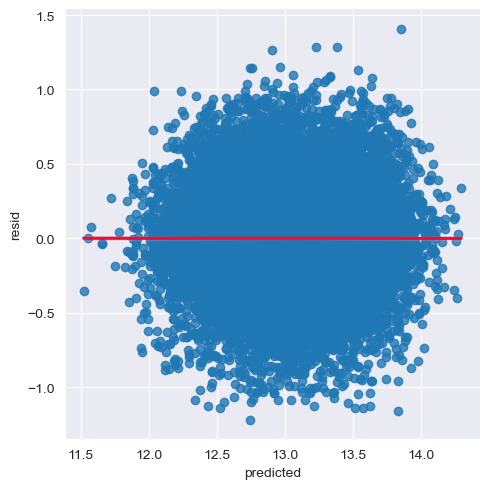

In [119]:
assumptions(zipcode_model)

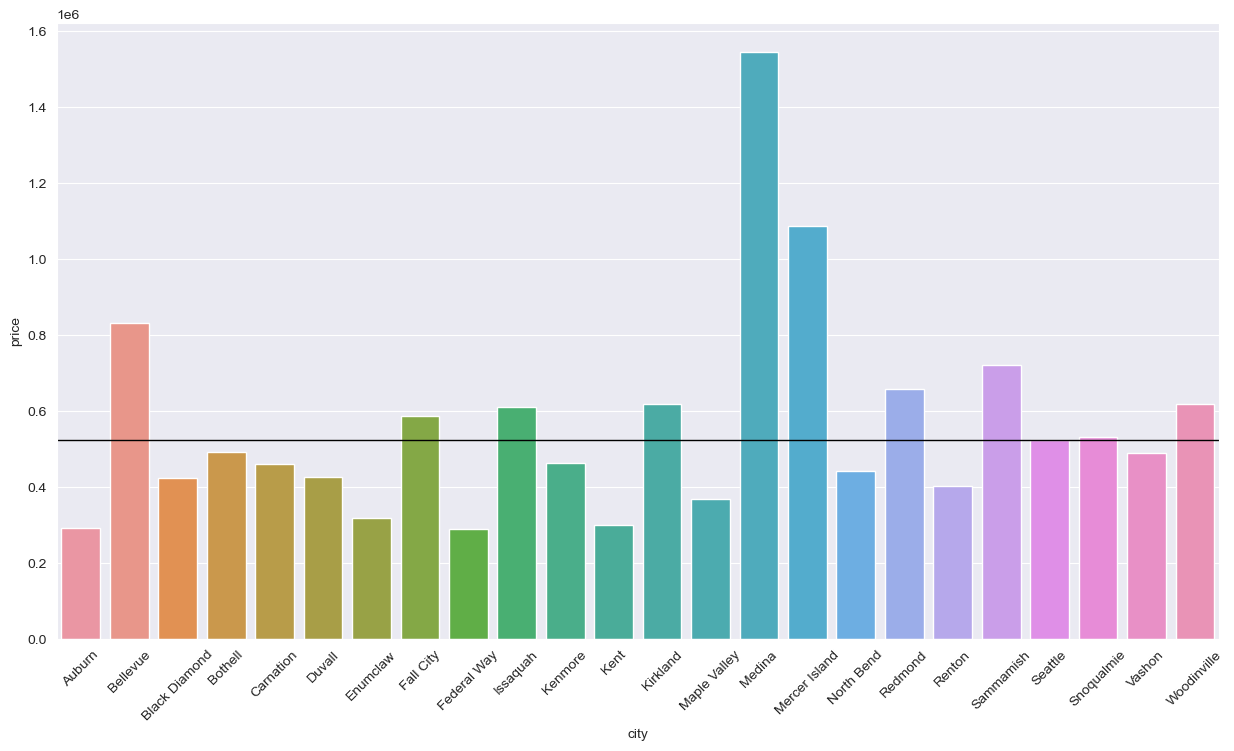

In [120]:
zipcode_city_df = zipcode_df.groupby('city').mean()[['price']]
zipcode_city_df.reset_index(inplace=True)

fig1 = plt.figure(figsize = (15,8))
ax = sns.barplot(data=zipcode_city_df, x='city', y='price')
plt.axhline(y=zipcode_df.price.mean(), color='black', lw=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

fig1.savefig("visualizations/city_with_highest_value_houses.png")

Based on the city the property is located in, we can observe a clear variety in the typical home price, ranging from $281k in Auburn to over $2 million in Medina.
Seattle appears to be right on our overall average for property prices according to our statistics, further supporting the decision to remove the new encoded feature.
A brief search reveals that Medina is a coveted location across King County. Apparently, there is also a relatively high number of millionaires.
The typical house prices on Mercer Island, which is nearby Medina and in great demand, demonstrate this. Our data from Mercer Island showed many more residences than Medina did, but the average price is still fairly high—more than double the county average.


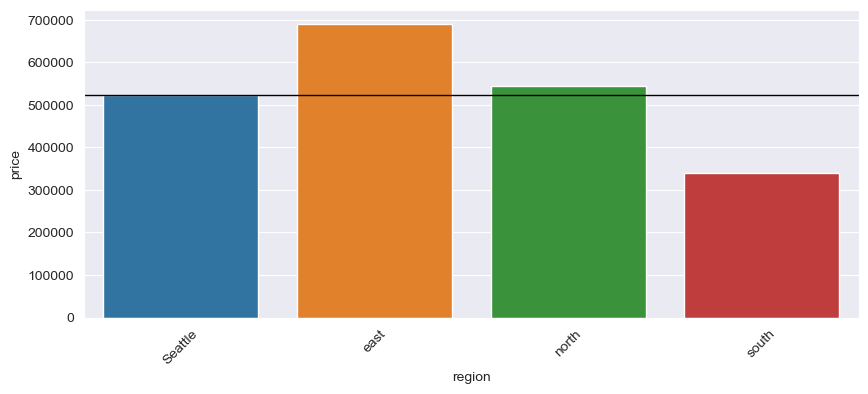

In [121]:
zipcode_region_df = zipcode_df.groupby('region').mean()[['price']]
zipcode_region_df.reset_index(inplace=True)

fig2 = plt.figure(figsize = (10,4))
ax = sns.barplot(data=zipcode_region_df, x='region', y='price')
plt.axhline(y=zipcode_df.price.mean(), color='black', lw=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

fig2.savefig("visualizations/region_with_the_highest_value_houses.png")

The east area appears to be the obvious victor in this comparison of regional average property prices. The average price in the south regions is less than half that in the east, while Seattle and the north area are quite comparable to the county average (and to one another).


### CONCLUSION: Top contriburing features to the price of a property

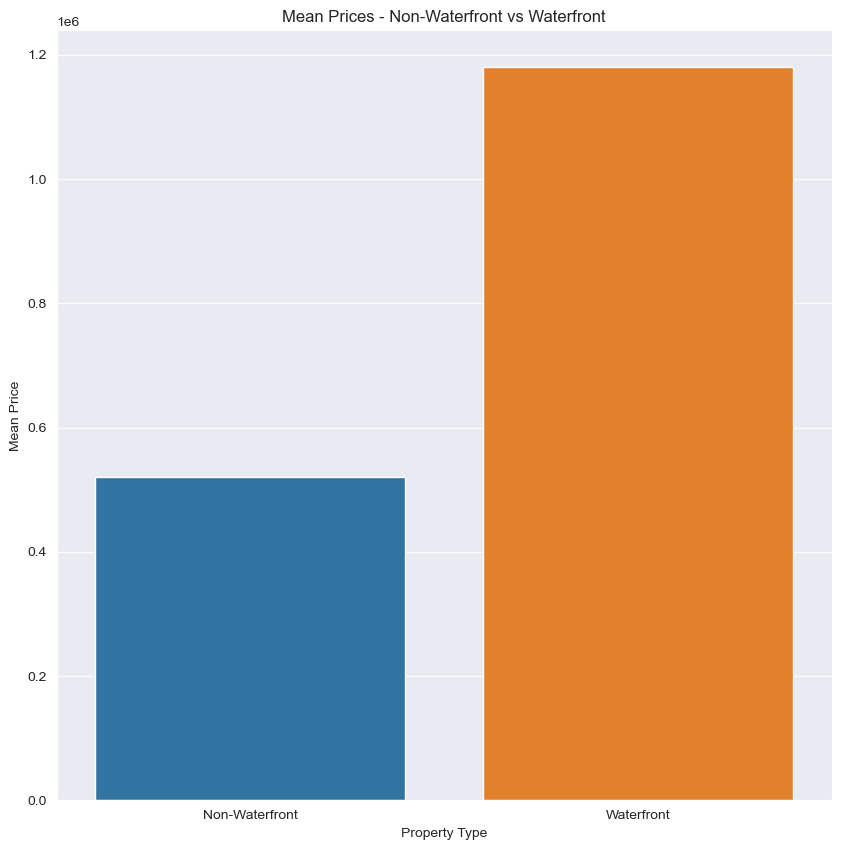

In [122]:
# mean price comparison for water front and non-waterfront properties
# Calculate the mean price for waterfront and non-waterfront properties
mean_prices = [zipcode_df[zipcode_df['waterfront'] == 0]['price'].mean(), zipcode_df[zipcode_df['waterfront'] == 1]['price'].mean()]

labels = ['Non-Waterfront', 'Waterfront']

fig3 = plt.figure(figsize=(10,10))
sns.barplot(x=labels, y=mean_prices)
plt.title('Mean Prices - Non-Waterfront vs Waterfront')
plt.xlabel('Property Type')
plt.ylabel('Mean Price')

plt.show()

fig3.savefig("visualizations/waterfront_or_no_waterfront.png")

In [123]:
# calculateing the mean price depeneding on grade
mean_price_grade_Poor = zipcode_df[zipcode_df['grade'] == 3]['price'].mean()
mean_price_grade_Low = zipcode_df[zipcode_df['grade'] == 4]['price'].mean()
mean_price_grade_Fair = zipcode_df[zipcode_df['grade'] == 5]['price'].mean()
mean_price_grade_Low_Average = zipcode_df[zipcode_df['grade'] == 6]['price'].mean()
mean_price_grade_Average = zipcode_df[zipcode_df['grade'] == 7]['price'].mean()
mean_price_grade_Good = zipcode_df[zipcode_df['grade'] == 8]['price'].mean()
mean_price_grade_Better = zipcode_df[zipcode_df['grade'] == 9]['price'].mean()
mean_price_grade_Very_Good = zipcode_df[zipcode_df['grade'] == 10]['price'].mean()
mean_price_grade_Excellent = zipcode_df[zipcode_df['grade'] == 11]['price'].mean()
mean_price_grade_Luxury = zipcode_df[zipcode_df['grade'] == 12]['price'].mean()
mean_price_grade_Mansion = zipcode_df[zipcode_df['grade'] == 13]['price'].mean()

# Display the mean prices
print("Mean Grade 3 Price - :", mean_price_grade_Poor)
print("Mean Grade 4 Price - :", mean_price_grade_Low)
print("Mean Grade 5 Price - :", mean_price_grade_Fair)
print("Mean Grade 6 Price - :", mean_price_grade_Low_Average)
print("Mean Grade 7 Price - :", mean_price_grade_Average)
print("Mean Grade 8 Price - :", mean_price_grade_Good)
print("Mean Grade 9 Price - :", mean_price_grade_Better)
print("Mean Grade 10 Price - :", mean_price_grade_Very_Good)
print("Mean Grade 11 Price - :", mean_price_grade_Excellent)
print("Mean Grade 12 Price - :", mean_price_grade_Luxury)
print("Mean Grade 13 Price - :", mean_price_grade_Mansion)

grades = ['Poor', 'Low', 'Fair', 'Low Average', 'Average', 'Good', 'Better', 'Very Good', 'Excellent', 'Luxury', 'Mansion']
mean_prices = [mean_price_grade_Poor,mean_price_grade_Low, mean_price_grade_Fair, mean_price_grade_Low_Average, mean_price_grade_Average,
                mean_price_grade_Good,mean_price_grade_Better,mean_price_grade_Very_Good,mean_price_grade_Excellent, mean_price_grade_Luxury, mean_price_grade_Mansion]

fig4 = plt.figure((10,10))
sns.barplot(x=grades, y=mean_prices)
plt.title('Mean Prices by Grade')
plt.xlabel('Grade')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

fig4.savefig("visualizations/grade_of_property_vs_price.png")

Mean Grade 3 Price - : 262000.0
Mean Grade 4 Price - : 227460.41666666666
Mean Grade 5 Price - : 255501.5129310345
Mean Grade 6 Price - : 302656.06646971934
Mean Grade 7 Price - : 402663.6977262595
Mean Grade 8 Price - : 542214.240804882
Mean Grade 9 Price - : 767380.2115163148
Mean Grade 10 Price - : 1012554.4629460202
Mean Grade 11 Price - : 1278809.1565217392
Mean Grade 12 Price - : 1627295.0819672132
Mean Grade 13 Price - : 1780000.0


TypeError: int() argument must be a string, a bytes-like object or a number, not 'tuple'

Mean Poor Price - : 360442.5925925926
Mean Fair Price - : 319113.7891566265
Mean Average Price - : 525980.3632834962
Mean Good Price - : 505952.96240468166
Mean Very Good Price - : 590620.3919239904


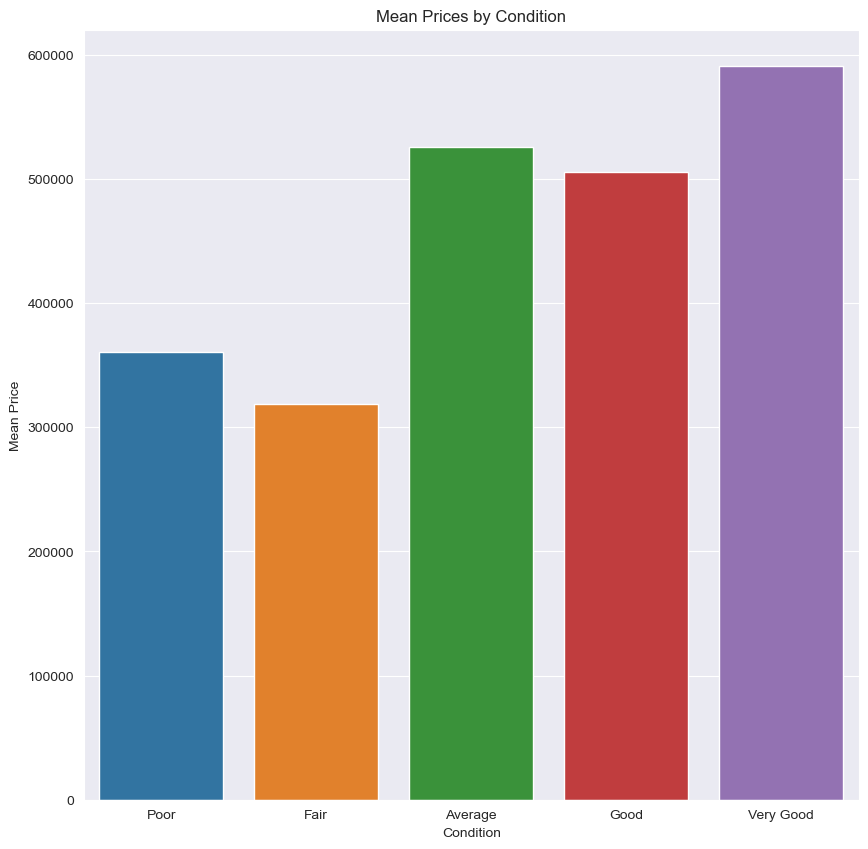

In [ ]:
# Calculate the mean price depending on condition of property
#Map condition column to numerical codes
# condition_mapping = {'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}
mean_price_condition_Poor = zipcode_df[zipcode_df['condition'] == 1]['price'].mean()
mean_price_condition_Fair = zipcode_df[zipcode_df['condition'] == 2]['price'].mean()
mean_price_condition_Average = zipcode_df[zipcode_df['condition'] == 3]['price'].mean()
mean_price_condition_Good = zipcode_df[zipcode_df['condition'] == 4]['price'].mean()
mean_price_condition_Very_Good = zipcode_df[zipcode_df['condition'] == 5]['price'].mean()

print("Mean Poor Price - :", mean_price_condition_Poor)
print("Mean Fair Price - :", mean_price_condition_Fair)
print("Mean Average Price - :", mean_price_condition_Average)
print("Mean Good Price - :", mean_price_condition_Good)
print("Mean Very Good Price - :", mean_price_condition_Very_Good)

conditions = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
mean_prices = [mean_price_condition_Poor, mean_price_condition_Fair, mean_price_condition_Average, mean_price_condition_Good, mean_price_condition_Very_Good]

fig5 = plt.figure(figsize=(10,10))

sns.barplot(x=conditions, y=mean_prices)
plt.title('Mean Prices by Condition')
plt.xlabel('Condition')
plt.ylabel('Mean Price')

plt.show()

fig5.savefig("visualizations/condition_vs_price.png")

### Recommendations

### Next Steps